In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [156]:
img_bgr = cv2.imread('/content/0028_rgb.tiff')
img_nir = cv2.imread('/content/0028_nir.tiff')

In [157]:
def cvt_BR(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [158]:
img_rgb = cvt_BR(img_bgr)
img_nir = cvt_BR(img_nir)

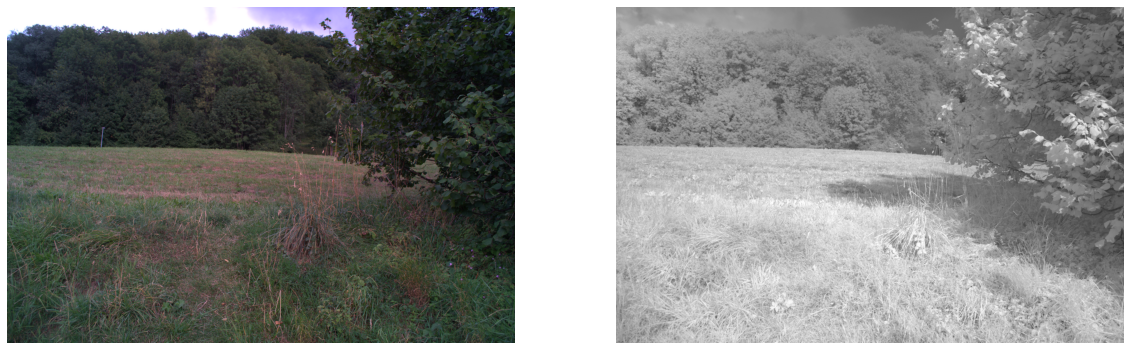

In [159]:
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.axis('off');plt.imshow(img_rgb)
plt.subplot(122);plt.axis('off');plt.imshow(img_nir)

In [160]:
img_nir[19][19]

array([168, 168, 168], dtype=uint8)

In [161]:
red_channel = img_bgr[:,:,0].astype('float64')

In [162]:
red_channel.shape

(678, 1024)

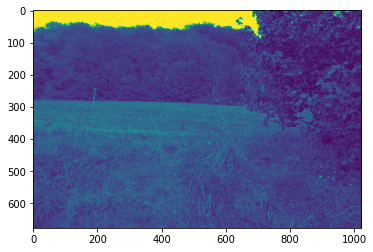

In [163]:
plt.imshow(red_channel)

In [164]:
img_nir.shape

(678, 1024, 3)

In [165]:
img_nir = img_nir[:,:,0].astype('float64')

In [166]:
img_nir.shape

(678, 1024)

In [167]:
img_nir[19][19]

168.0

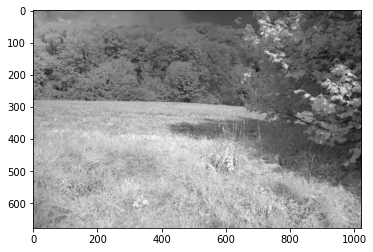

In [168]:
plt.imshow(img_nir, cmap='gray')

In [169]:
denominator = red_channel + img_nir
print(np.amax(denominator))

456.0


In [178]:
alpha = 0.0
numerator = red_channel - img_nir 
denominator = (red_channel + img_nir) + alpha
NDVI = numerator / denominator

In [179]:
np.argmax(NDVI, axis=None)

55287

In [180]:
idx = np.unravel_index(55287,(680,1024))

In [181]:
idx

(53, 1015)

In [182]:
NDVI[53][1015]

0.5678391959798995

In [183]:
np.amin(NDVI)

-1.0

In [184]:
NDVI.shape

(678, 1024)

In [185]:
NDVI_flat = NDVI.flatten()
print(NDVI_flat.shape)
print(NDVI_flat[0])

(694272,)
0.24390243902439024


In [197]:
def histogram1d(NDVI_flat, b = 30):
    img = NDVI_flat
    plt.hist(img, bins=b, color='red', alpha=1, histtype='step')

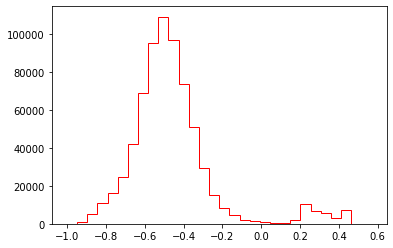

In [199]:
Hist = histogram1d(NDVI_flat)

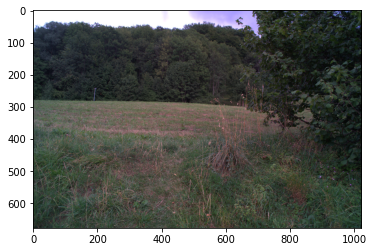

In [188]:
plt.imshow(img_rgb)

In [189]:
Colorized_NDVI = np.copy(img_rgb)

In [190]:
rgb_copy[:,:,1] = Colorized_NDVI 

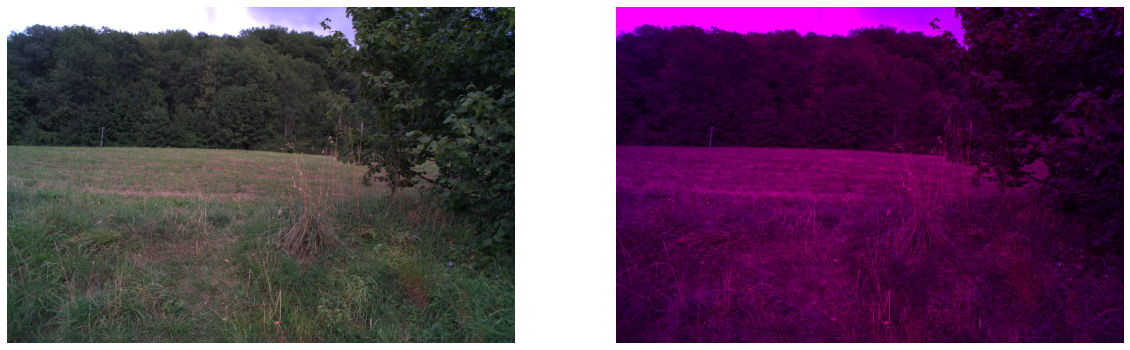

In [192]:
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.axis('off');plt.imshow(img_rgb)
plt.subplot(122);plt.axis('off');plt.imshow(rgb_copy)